In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
import sklearn.datasets
import sklearn.linear_model
% matplotlib inline
np.random.seed(1)

In [3]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of training examples
    N = int(m/2) # number of point per class
    D = 2 # dimensionality
    X = np.zeros((m,D))
    Y = np.zeros((m, 1), dtype= 'uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of flower
    
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [4]:
X, Y = load_planar_dataset()

In [5]:
def plot_decision_boundary(model, X, y):
    # set min and max values and gives it some padding
    x_min, x_max = X[0,:].min() -1, X[0, :].max() - 1
    y_min, y_max = X[1,:].min() -1, X[1, :].max() -1
    h = 0.01
    # generate a grid of point with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # predict the function value for the whole grid
    z = model(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    # plot the contour and training example(
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.Spectral);

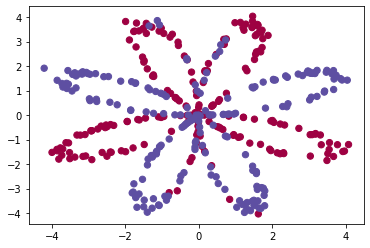

In [6]:
plt.scatter(X[0,:], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [7]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[1]

print('shape_X: ' + str(shape_X))
print('shape_Y: ' + str(shape_Y))
print('m: ' + str(m))

shape_X: (2, 400)
shape_Y: (1, 400)
m: 400


In [8]:
# train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\ADEBOWALE\OneDrive\Documents\data\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy of logistic regression: 47 %(percentage of correctly labelled datapoints)


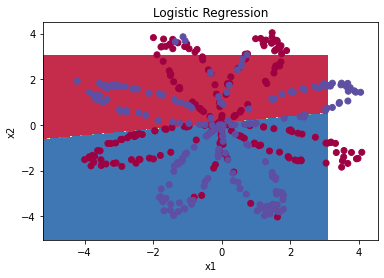

In [9]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title('Logistic Regression')

LR_predictions = clf.predict(X.T)
print('accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y, 1 - LR_predictions)) / float(Y.size) * 100) + '%' + "(percentage of correctly labelled datapoints)")

In [10]:
# layers sizes

def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [11]:
def layer_sizes_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(5, 3)
    Y_assess = np.random.randn(2, 3)
    return X_assess, Y_assess

In [12]:
X_assess, Y_assess = layer_sizes_test_case()
n_x, n_h, n_y = layer_sizes(X_assess, Y_assess)
print('the sizes of the input layer is: n_x = ' + str(n_x))
print("the sizes of the hidden_layer is: n_h = " + str(n_h))
print('the sizes of the output_layer is: n_y = ' + str(n_y))

the sizes of the input layer is: n_x = 5
the sizes of the hidden_layer is: n_h = 4
the sizes of the output_layer is: n_y = 2


In [13]:
# initialize the model parameter

def initialize_parameter(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                 "b1": b1,
                  "W2" : W2,
                   "b2": b2}
    return parameters

In [14]:
def initialize_parameters_test_case():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y

In [15]:
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameter(n_x, n_h, n_y)

print("W1 ="  + str(parameters["W1"]))
print("b1 ="  + str(parameters["b1"]))
print("W2 = "  + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 =[[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 =[[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [16]:
def forward_propagation(X, parameters):
    # retrieve each parameter from the dictionary
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #implement forward propagation to calculate the A2 (probalities)
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [17]:
def sigmoid(x):
    
    s = 1.0/(1 + np.exp(-x))
    
    return s

In [18]:
s = sigmoid(0)
print(s)

0.5


In [19]:
# forward propagation test_cases()

def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    b1 = np.random.randn(4, 1)
    b2 = np.array([[-1.3]])
    
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': b1,
     'b2': b2}
    
    return X_assess, parameters

In [20]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [21]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = np.sum(logprobs) / m
    
    cost = np.squeeze(cost)
    
    return cost

In [22]:
def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return A2, Y_assess, parameters


In [23]:
A2, Y_assess, parameters = compute_cost_test_case()
print('cost = ' + str(compute_cost(A2, Y_assess, parameters)))

cost = -0.6751630453465115


In [24]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
     # first retrieve W1 and W2 from the dictionary 'parameters'
        
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # retreive also A1 and A2 from the dictionary "cache"
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation calculate: dW1, dW2, db1, db2
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims= True)
    
    grads = {"dW1": dW1,
             "db1": db1,
              "dW2": dW2,
              "db2": db2}
    
    return grads

In [25]:
def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess

    

In [26]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print('dW1 = ' + str(grads["dW1"]))
print('db1 = ' + str(grads["db1"]))
print('dW2 = ' + str(grads["dW2"]))
print('db2 = ' + str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [27]:
def update_parameters(parameters, grads, learning_rate=1.2):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #retrieve each gradient from the dictionary
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
   # update rule for each parameters

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = { "W1": W1, 
                    "b1" : b1,
                    "W2": W2,
                      "b2": b2}
    return parameters

In [28]:
def update_parameters_test_case():
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
    return parameters, grads

In [29]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print('W1 = ' + str(parameters['W1']))
print('b1 = ' + str(parameters['b1']))
print('W2 = ' + str(parameters['W2']))
print('b2 = ' + str(parameters['b2']))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [30]:
# nn_model
def nn_model(X, Y, n_h, num_iterations = 1000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # initialize parameters, then retrieve W1, b1, W2, b2. inputs: n_x, n_h, n_y. W1, b1, W2, b2, parameter.
    parameters = initialize_parameter(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        # forward propagation. inputs: X, parameters. outputs: A2, cache.
        A2, cache = forward_propagation(X, parameters)
        
        #cost function. inputs: A2, Y, parameters. outputs: 'cost',
        cost = compute_cost(A2, Y, parameters)
        
        # backpropagation. inputs: parameters, cache, X, Y. outputs: grads.
        grads = backward_propagation(parameters, cache, X, Y)
        
        # gradient descent parameter update. Inputs: parameters, grads. outputs: parameter
        parameters = update_parameters(parameters, grads)
        
        # print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
            
        return parameters

In [31]:
def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    Y_assess = (np.random.randn(1, 3) > 0)
    return X_assess, Y_assess

In [32]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)

In [37]:
def predict(parameters, X):
    
    # computes probabilities using forward propagation, and classifier to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5) * 1
    
    return predictions

In [38]:
def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3)
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess

In [39]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: -0.693048


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

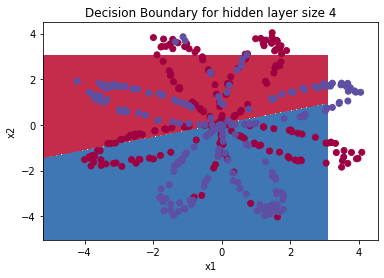

In [41]:
# build a model with a n_h-dimensional hidden layer
parameter = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [42]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 54%


Accuracy for 1 hidden units: 67.25 %
Accuracy for 2 hidden units: 65.0 %
Accuracy for 3 hidden units: 58.5 %
Accuracy for 4 hidden units: 57.99999999999999 %
Accuracy for 5 hidden units: 47.25 %
Accuracy for 20 hidden units: 51.5 %
Accuracy for 50 hidden units: 55.25 %


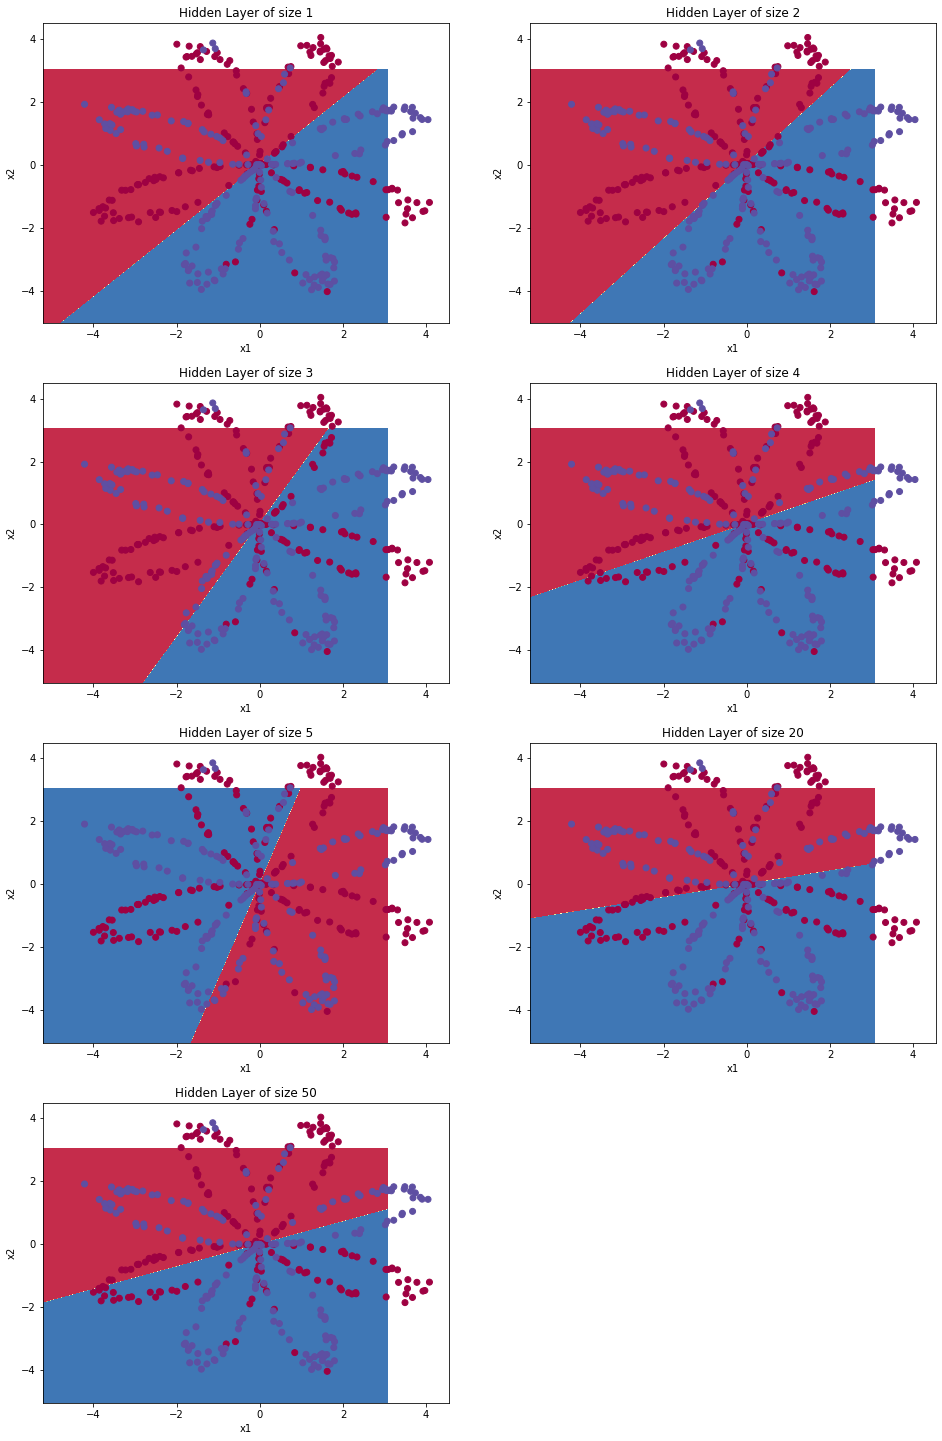

In [43]:

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [45]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

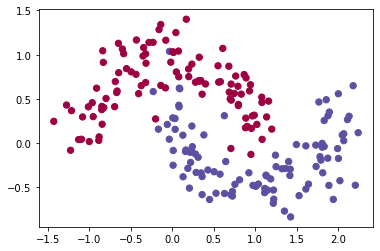

In [46]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y % 2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);